Assuming that there is a linear relationship between the size of the house and the price, it is a linear regression.

In [382]:
import pandas as pd
from loguru import logger

data = {'size': [1, 2, 3],
        'price': [1, 2, 3]}
df = pd.DataFrame(data)
logger.info(df)

2021-12-17 21:59:24.901 | INFO     | __main__:<module>:7 -    size  price
0     1      1
1     2      2
2     3      3


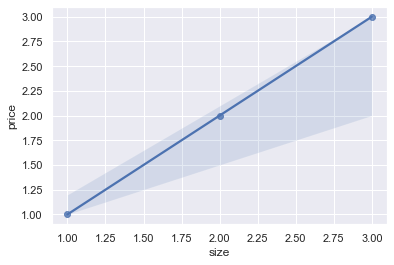

In [383]:

import seaborn as sns

sns.set_theme(color_codes=True)
sns.regplot(x="size", y="price", data=df);

<img src="../img/univariate/univariate_main_algorithm.png" width="750"/>

### The Hypothesis Function
Hypothesis is a function representing the relationship between input (feature) and output (target).
“How to express the relationship between variables and outputs with these and these functions? It is believed that they began to call it a hypothesis because it puts up a kind of hypothesis. Hypothesis can take the form of any function, but the following linear functions are often used.


<img src="../img/univariate/univariate_main_formulas.png" width="750"/>

<img src="../img/univariate/univariate_lr_hypotesis_visual.png" width="550"/>

### Cost function details explained

<img src="../img/univariate/univariate_lr_cost_function.png" width="750"/>





In [384]:
data = {'size': [1, 2, 3],
        'price': [1, 2, 3]}
df = pd.DataFrame(data)


#hypothesis implementation
def hypothesis(theta0, theta1, x):
    return theta0 + theta1 * x


#Cost function formula implementation
def cost_function(theta0, theta1, df):
    hypo_results = list(map(lambda x, y: (hypothesis(theta0, theta1, x) - y) ** 2, df["size"], df["price"]))
    cost_function_res = 1 / (2 * len(df["price"])) * sum(hypo_results)
    logger.info(
        "For theta1 = %.2f, cost function is = %.2f, hypothesis = %s" % (theta1, cost_function_res, hypo_results))
    return cost_function_res


thetas1 = [1, 0.5, 0]

for t1 in thetas1:
    cost_function(0, t1, df)


2021-12-17 21:59:27.651 | INFO     | __main__:cost_function:15 - For theta1 = 1.00, cost function is = 0.00, hypothesis = [0, 0, 0]
2021-12-17 21:59:27.653 | INFO     | __main__:cost_function:15 - For theta1 = 0.50, cost function is = 0.58, hypothesis = [0.25, 1.0, 2.25]
2021-12-17 21:59:27.654 | INFO     | __main__:cost_function:15 - For theta1 = 0.00, cost function is = 2.33, hypothesis = [1, 4, 9]


## Before we move forward, let's refresh basic linear algebra concepts and operations:

<img src="../img/linear_algebra/scalar_vector_matrix.png" width="750"/>

### Scalar
Scalars are mathematical entities which have **only a magnitude** (and **no direction**). Physical examples include mass and energy.

### Vector
**Definition**: A vector is a list of numbers. There are (at least) two ways to interpret what this list of numbers mean:

**One way:**
Think of the vector as being a point in a space. Then this list of numbers is a way of identifying that point in space, where each number represents the vector’s component that dimension.

**Another way:**
Think of a vector is a **magnitude** and a **direction**, e.g. a quantity like velocity (“the fighter jet’s velocity is 250 mph north-by-northwest”). In this way of think of it, a vector is a **directed arrow pointing** from the origin to the end point given by the list of numbers.

**Example:**
$a^{->} = [4, 3]$. Graphically, you can think of this vector as an arrow in the x-y (two dimensional space) plane, pointing from the origin to the point at x=3, y=4

<img src="../img/linear_algebra/vector_visual_representation.png" width="350"/>

**Vector and scalar operations:**

All binary operations between a vector and a scalar are accomplished by operating on each entry in the vector individually. The following shows vector-scalar addition as well as vector-scalar multiplication:

Addition:
$ \begin{align}
    -3 +
        \begin{bmatrix}
           {1} \\
           {5} \\
           {0}
         \end{bmatrix}
         =
         \begin{bmatrix}
           {-2} \\
           {-2} \\
           {-3}
         \end{bmatrix}
  \end{align}$

Multiplication:
$ \begin{align}
    -3 \cdot
        \begin{bmatrix}
           {1} \\
           {5} \\
           {0}
         \end{bmatrix}
         =
         \begin{bmatrix}
           {-3} \\
           {-15} \\
           {0}
         \end{bmatrix}
  \end{align}$


### Scalar multiplication
The term scalar multiplication refers to the product of a real number and a matrix. In scalar multiplication, each entry in the matrix is multiplied by the given scalar.
<img src="../img/linear_algebra/matrices_and_scalar multiplication.png" width="450"/>

In [385]:
# Scalar to vector multiplication
scalar = 2
vector = [1, 5, 0]
print(list(map(lambda s: s * scalar, vector)))

[2, 10, 0]


In [386]:
# Scalar to matrix multiplication
import numpy as np

scalar = 2
m = [[5, 2],
     [3, 1]]

matrix_res = np.zeros((len(m), len(m)), dtype=int)

for i in range(len(m)):
    for j in range(len(m)):
        matrix_res[i][j] = scalar * m[i][j]

print(matrix_res)

[[10  4]
 [ 6  2]]


### Matrices addition
A matrix, like a vector, is also a collection of numbers. The difference is that a matrix is a table of numbers rather than a list. (In fact, you can think of vectors as matrices that happen to only have one column or one row.)

**Matrix addition and subtraction:**
<img src="../img/linear_algebra/matrices_addition_substraction.png" width="450"/>

[Check your understanding](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:matrices/x9e81a4f98389efdf:adding-and-subtracting-matrices/a/adding-and-subtracting-matrices)


In [387]:
# Addition matrices
def matrices_addition(m1, m2):
    matrix_res = np.zeros((len(m1), len(m2)), dtype=int)
    for row in range(len(m2)):
        for col in range(len(m2)):
            matrix_res[row][col] = m1[row][col] + m2[row][col]
            print(" %i + %i = %i" % (m1[row][col], m2[row][col], m1[row][col] + m2[row][col]))
    return matrix_res


a = [[4, 8],
     [3, 7]]

b = [[1, 0],
     [5, 2]]

print(matrices_addition(a, b))

 4 + 1 = 5
 8 + 0 = 8
 3 + 5 = 8
 7 + 2 = 9
[[5 8]
 [8 9]]


### Matrix and vector multiplication

A Matrix and a vector can be multiplied only if the number of columns of the matrix and the the dimension of the vector have **the same size.**

<img src="../img/linear_algebra/matrix_vector_product.png" width="750"/>


In [388]:
# Matrix to vector multiplication
def matrix_vector_multiplication(m, vector):
    vector_res = np.zeros((len(m), 1), dtype=int)
    for i in range(3):
        for j in range(2):
            vector_res[i][0] += m[i][j] * vector[j][0]
    return vector_res


m = [[1, 2],
     [3, 4],
     [5, 6]]

vector = [[1],
          [2]]

print(matrix_vector_multiplication(m, vector))

[[ 5]
 [11]
 [17]]


### Matrices multiplication
refers to the product of two matrices. The resulting matrix, known as the matrix product, has the number of rows of the first and the number of columns of the second matrix. The product of matrices A and B is denoted as AB.

<img src="../img/linear_algebra/matrices_multiplication.png" width="450"/>


[Check your understanding with matrices](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:matrices/x9e81a4f98389efdf:multiplying-matrices-by-matrices/a/multiplying-matrices)

In [389]:
# Multiply each element of row matrix 1 to the each element of the column matrix 2.
# check yourself https://keisan.casio.com
def matrices_multiplication(m1, m2):
    matrix_res = np.zeros((len(m1), len(m2)), dtype=int)

    for i in range(len(m1)):
        for col in range(len(m2)):
            for row in range(len(m2)):
                matrix_res[i][col] += m1[i][row] * m2[row][col]
                print(" %i * %i = %i" % (m1[i][row], m2[row][col], m1[i][row] * m2[row][col]))
    return matrix_res


a = [[1, 2],
     [3, 4]]

b = [[5, 6],
     [7, 8]]

print(matrices_multiplication(a, b))

 1 * 5 = 5
 2 * 7 = 14
 1 * 6 = 6
 2 * 8 = 16
 3 * 5 = 15
 4 * 7 = 28
 3 * 6 = 18
 4 * 8 = 32
[[19 22]
 [43 50]]


## How to use matrices multiplication for the **linear regression** implementation

In [390]:
import pandas as pd
import numpy as np

'''
https://numpy.org/doc/1.21/
https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
'''
#appartment square meters and price
df = pd.DataFrame({'size': [47, 53, 67, 90],
                   'price': [84, 87, 97, 115]})
#prepare matrix with apartment size
house_size_matrix = np.array(list(map(lambda s: [1, s], df['size'])))
print("house size matrix representation\n", house_size_matrix)

#prepare theta0 and theta1 vectors
thetas_vector1 = np.array([[2],
                           [1.411]])
print("theta0 and theta1 vector\n", thetas_vector1)

#provide prediction results for the prices with hypothesis function by matrix and vector multiplication
predictions_by_hypothesis = np.zeros(len(df['size']))
for i in range(len(df['size'])):
    for j in range(2):
        print(house_size_matrix[i][j], "*", thetas_vector1[j][0])
        predictions_by_hypothesis[i] += thetas_vector1[j][0] * house_size_matrix[i][j]

print("prices predicted with vector  =", predictions_by_hypothesis)
print("real prices =", list(df["price"]))

# Calculate cost function for predictions by hypothesis
hypo_results = list(map(lambda x, y: (x - y) ** 2, predictions_by_hypothesis, df["price"]))
cost_function_res = 1 / (2 * len(df["price"])) * sum(hypo_results)
print("cost function results based on  matrix implementation =", cost_function_res)

house size matrix representation
 [[ 1 47]
 [ 1 53]
 [ 1 67]
 [ 1 90]]
theta0 and theta1 vector
 [[2.   ]
 [1.411]]
1 * 2.0
47 * 1.411
1 * 2.0
53 * 1.411
1 * 2.0
67 * 1.411
1 * 2.0
90 * 1.411
prices predicted with vector  = [ 68.317  76.783  96.537 128.99 ]
real prices = [84, 87, 97, 115]
cost function results based on  matrix implementation = 68.284755875


In [391]:
# Compare results with previous cost function implementation
cost_function_res_above = cost_function(thetas_vector1[0], thetas_vector1[1], df)
print("cost function results based on function implementation =", cost_function_res_above)

2021-12-17 21:59:38.378 | INFO     | __main__:cost_function:15 - For theta1 = 1.41, cost function is = 68.28, hypothesis = [array([245.956489]), array([104.387089]), array([0.214369]), array([195.7201])]


cost function results based on function implementation = [68.28475588]


<AxesSubplot:xlabel='size', ylabel='price'>

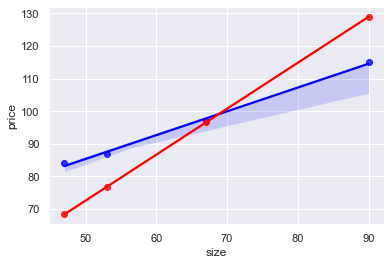

In [392]:
import seaborn as sns

df_predicted = pd.DataFrame({'size': df['size'],
                             'price': predictions_by_hypothesis})

sns.regplot(x="size", y="price", color="blue", data=df)
sns.regplot(x="size", y="price", color="red", data=df_predicted)